In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import  variance_inflation_factor

In [2]:
df=pd.read_excel("EdTech.xlsx")

In [3]:
df.columns = df.columns.str.replace(' ','_')

In [4]:
df.head()

,S.No,Institute,Institute_brand_value,Course_Offered,Course_level,No_of_Instructors,Total_Course_Hours,Mode_of_Course,Webportal_LifetimeAccess,Certification_Exam,Placement_Offered,Level,R&D_Spend,Marketing_Spend,Administration,Price
0,1,Ineuron,Low,Data_Science,Intermediate,2,400,Offline,Yes,No,Yes,A,165349.20,471784.10,136897.80,35000
1,2,Great_Learning,High,Ethical_hacking,Intermediate,4,300,Online,Yes,Yes,No,A,162597.70,443898.53,151377.59,70000
2,3,Edyoda,Medium,AI,Advance,2,600,Online,No,Not Applicable,Yes,A,153441.51,407934.54,101145.55,45000
3,4,Edyoda,Medium,Tableau,Beginers,2,90,Offline,No,Not Applicable,No,B,144372.41,383199.62,118671.85,25000
4,5,Ineuron,Low,AI,Advance,2,600,Online,Yes,No,No,B,142107.34,366168.42,91391.77,45000


In [ ]:
df['Course_Offered'].value_counts()

In [ ]:
df['Mode_of_Course'].value_counts()

In [ ]:
df['Institute_brand_value'].value_counts()

In [ ]:
Institute_brand_value	Course_Offered	Course_level,Total_Course_Hours,Webportal LifetimeAccess,Certification Exam,Placement Offered

In [ ]:
df['Course_level'].value_counts()

In [ ]:
df['Webportal_LifetimeAccess'].value_counts()

In [ ]:
df['Certification_Exam'].value_counts()

In [ ]:
df['Placement_Offered'].value_counts()

In [5]:
df.isnull().sum()

S.No                        0
Institute                   0
Institute_brand_value       0
Course_Offered              0
Course_level                0
No_of_Instructors           0
Total_Course_Hours          0
Mode_of_Course              0
Webportal_LifetimeAccess    0
Certification_Exam          0
Placement_Offered           0
Level                       0
R&D_Spend                   0
Marketing_Spend             0
Administration              0
Price                       0
dtype: int64

In [ ]:
#Check for outliers
sns.boxplot(data=df,orient='h',palette='Set2')

In [ ]:
sns.stripplot(data=df,orient='h',palette='Set2')

In [6]:
#Exploratory Data Analysis
from scipy import stats
import pylab

In [7]:
#Dropping un-necessary columns
df.drop(['S.No','Institute'],axis=1, inplace=True)

In [ ]:
#checking linear relationship
sns.pairplot(df,kind='scatter')
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Institute_brand_value     150 non-null    object 
 1   Course_Offered            150 non-null    object 
 2   Course_level              150 non-null    object 
 3   No_of_Instructors         150 non-null    int64  
 4   Total_Course_Hours        150 non-null    int64  
 5   Mode_of_Course            150 non-null    object 
 6   Webportal_LifetimeAccess  150 non-null    object 
 7   Certification_Exam        150 non-null    object 
 8   Placement_Offered         150 non-null    object 
 9   Level                     150 non-null    object 
 10  R&D_Spend                 150 non-null    float64
 11  Marketing_Spend           150 non-null    float64
 12  Administration            150 non-null    float64
 13  Price                     150 non-null    int64  
dtypes: float64

In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [10]:
for column_name in df.columns:
    if df[column_name].dtype==object:
        df[column_name]=lb.fit_transform(df[column_name])
    else:
        pass        

In [11]:
df.head()

,Institute_brand_value,Course_Offered,Course_level,No_of_Instructors,Total_Course_Hours,Mode_of_Course,Webportal_LifetimeAccess,Certification_Exam,Placement_Offered,Level,R&D_Spend,Marketing_Spend,Administration,Price
0,1,1,2,2,400,0,1,0,1,1,165349.20,471784.10,136897.80,35000
1,0,2,2,4,300,1,1,2,0,1,162597.70,443898.53,151377.59,70000
2,2,0,0,2,600,1,0,1,1,1,153441.51,407934.54,101145.55,45000
3,2,4,1,2,90,0,0,1,0,2,144372.41,383199.62,118671.85,25000
4,1,0,0,2,600,1,1,0,0,2,142107.34,366168.42,91391.77,45000


In [12]:
#Input Output split
y = df.iloc[:,13]
x = df.iloc[:,df.columns!='Price']

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [13]:
#Calculation of the VIF SCORE
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)] for i in range(arr.shape[1])],columns = ["Feature","VIF_SCORE"])                     
    

In [14]:
vif_score(x)

,Feature,VIF_SCORE
0,Institute_brand_value,8.274821
1,Course_Offered,7.760367
2,Course_level,1.122484
3,No_of_Instructors,25.682206
4,Total_Course_Hours,8.030456
5,Mode_of_Course,1.087775
6,Webportal_LifetimeAccess,2.118195
7,Certification_Exam,12.762290
8,Placement_Offered,1.102132
9,Level,1.054709


In [ ]:
#Since the VIF score is inf for some features, this indicates perfect co-relation hence removing them 

In [15]:
#Dropping un-necessary columns
x.drop(['No_of_Instructors'],axis=1, inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
x

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
norm_func = MinMaxScaler()

In [ ]:
x = norm_func.fit_transform(x)
x

In [ ]:
x = pd.DataFrame(x)

In [17]:
#Input output split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
#Feature selection based on mutual info regresssion

In [18]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(x_train,y_train)

In [19]:
mutual_info = mutual_info_regression(x_train,y_train)

In [ ]:
mutual_infoarray([0.53770794, 1.58685484, 0.92763472, 1.55269277, 0.        ,
       0.05799415, 0.16444054, 0.04322748, 0.        , 0.        ,
       0.        , 0.        ])

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Total_Course_Hours          1.526070
Course_Offered              1.475830
Course_level                0.904320
Institute_brand_value       0.563182
Certification_Exam          0.241379
Webportal_LifetimeAccess    0.092273
Marketing_Spend             0.063388
Administration              0.003008
Mode_of_Course              0.000000
Placement_Offered           0.000000
Level                       0.000000
R&D_Spend                   0.000000
dtype: float64

<AxesSubplot:>

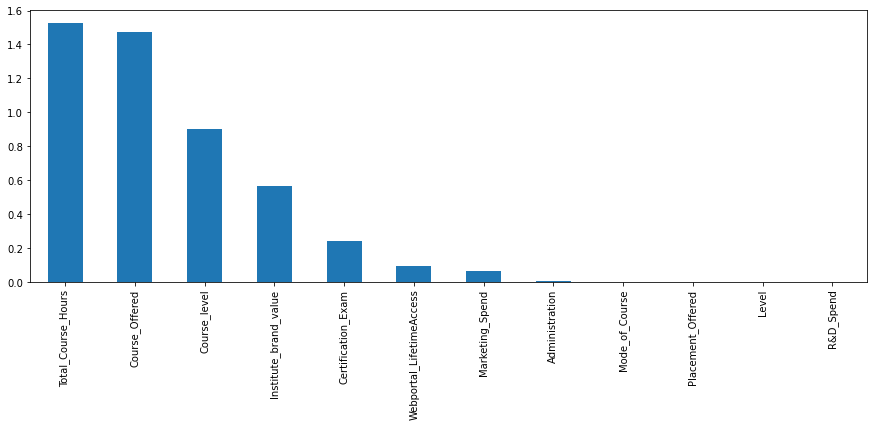

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [22]:
from sklearn.feature_selection import SelectPercentile

In [23]:
select_top_columns = SelectPercentile(mutual_info_regression,percentile=70)

In [24]:
select_top_columns.fit(x_train,y_train)

SelectPercentile(percentile=70,
                 score_func=<function mutual_info_regression at 0x000001DE93C23EE0>)

In [25]:
x_train.columns[select_top_columns.get_support()]

Index(['Institute_brand_value', 'Course_Offered', 'Course_level',
       'Total_Course_Hours', 'Mode_of_Course', 'Webportal_LifetimeAccess',
       'Certification_Exam', 'Marketing_Spend'],
      dtype='object')

In [26]:
x.drop(['Mode_of_Course','Level','R&D_Spend','Marketing_Spend','Administration'],axis=1, inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
x

,Institute_brand_value,Course_Offered,Course_level,Total_Course_Hours,Webportal_LifetimeAccess,Certification_Exam,Placement_Offered
0,1,1,2,400,1,0,1
1,0,2,2,300,1,2,0
2,2,0,0,600,0,1,1
3,2,4,1,90,0,1,0
4,1,0,0,600,1,0,0
...,...,...,...,...,...,...,...
145,2,3,2,350,1,2,0
146,1,4,1,150,1,0,0
147,0,1,2,400,1,2,0
148,2,0,0,600,0,1,1


In [ ]:
df['Institute_brand_value'].value_counts()

In [ ]:
df['Course_Offered'].value_counts()

In [ ]:
df['Webportal_LifetimeAccess'].value_counts()

In [ ]:
df['Certification_Exam'].value_counts()

In [ ]:
df['Placement_Offered'].value_counts()

In [ ]:
df['Course_level'].value_counts()

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [29]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [30]:
dt_model = DT.fit(x_train,y_train)

In [31]:
dt_ypred = dt_model.predict(x_test)

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [33]:
score=r2_score(y_test,dt_ypred)
print('r2 socre is',score)

r2 socre is 1.0


In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [35]:
model = lr.fit(x_train,y_train)

In [36]:
y_pred = model.predict(x_test)

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [38]:
score=r2_score(y_test,y_pred)
print('r2 socre is',score)

r2 socre is 0.9597453747432333


In [39]:
print('mse:',mean_squared_error(y_test,y_pred))

mse: 9764922.267425073


In [40]:
print('rmse:',np.sqrt(mean_squared_error(y_test,y_pred)))

rmse: 3124.8875607651985


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
x_train

,Institute_brand_value,Course_Offered,Course_level,Total_Course_Hours,Webportal_LifetimeAccess,Certification_Exam,Placement_Offered
15,2,0,0,600,0,1,1
39,0,3,2,350,1,2,0
106,1,2,2,300,1,0,0
31,2,4,1,90,0,1,0
132,0,4,1,60,1,2,1
...,...,...,...,...,...,...,...
93,2,1,2,400,0,1,1
82,0,3,2,350,1,2,1
69,1,4,1,60,1,0,1
55,2,4,1,60,0,1,1


In [43]:
rf = RandomForestRegressor()

In [44]:
rf_model = rf.fit(x_train,y_train)

In [54]:
x_test

,Institute_brand_value,Course_Offered,Course_level,Total_Course_Hours,Webportal_LifetimeAccess,Certification_Exam,Placement_Offered
6,2,1,2,400,0,1,1
73,0,3,2,350,1,2,1
133,2,0,0,600,0,1,0
62,2,3,2,350,1,2,0
97,0,4,1,150,1,2,1
126,2,4,1,60,1,2,0
29,1,1,2,400,1,0,0
95,2,2,2,300,1,2,1
66,2,2,2,300,1,2,0
128,2,0,0,600,0,1,0


In [45]:
y_rfpred = rf_model.predict(x_test)

In [46]:
score=r2_score(y_test,y_rfpred)
print('r2 score is',score)

r2 score is 0.9999955340988728


In [47]:
y_rftrainpred = rf_model.predict(x_train)

In [48]:
score_train=r2_score(y_train,y_rftrainpred)
print('r2 score is',score_train)

r2 score is 0.9999947315567543


In [ ]:
x

In [ ]:
temp = pd.DataFrame({'variable':x.columns,'coefficient':model.coef_[0]}).sort_values('coefficient', ascending=False)
temp

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model1 = ExtraTreesRegressor()

In [ ]:
model1.fit(x,y)

In [ ]:
model1.feature_importances_

In [ ]:
temp1 = pd.DataFrame({'variable':x.columns,'importance':model1.feature_importances_}).sort_values('importance', ascending=False)
temp1

In [ ]:
import seaborn as sns

In [ ]:
chart = sns.barplot(x = "variable",y = "coefficient",data = temp)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
import xgboost as xgb

In [ ]:
model_xgb = xgb.XGBRegressor()

In [ ]:
xgbr = model_xgb.fit(x_train,y_train)

In [ ]:
y_xgbpred = xgbr.predict(x_test)

In [ ]:
score_xg=r2_score(y_test,y_xgbpred)
print('r2 score is',score_xg)

In [ ]:
y_xgbtrain = xgbr.predict(x_train)

In [ ]:
score_xgtrain=r2_score(y_train,y_xgbtrain)
print('r2 score is',score_xgtrain)

In [49]:
import pickle

In [50]:
file = open('edtechrandommodel1.pkl',"wb")
pickle.dump(rf_model,file)

In [55]:
rf_model.predict([[2,1,1,0,320,2,0,]])

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([27500.])

In [ ]:
1,1,2,2,400,1,0,1